***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [108]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [109]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [110]:
# verficando valores maximo e minimo para criar os intervalos das classes
print(df.Renda.min())
print(df.Renda.max())

0
200000


In [111]:
classes = [0,(2*788),(5*788),(15*788),(25*788),200000]

### 2º Definir os labels das classes

In [112]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [113]:
frequencia = pd.value_counts(pd.cut(x = df.Renda, bins = classes, labels = labels, include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [114]:
percentual = (pd.value_counts(pd.cut(x=df.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True) * 100).round(2)
percentual

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [115]:
dist_freq_classes_renda = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_classes_renda.sort_index(ascending = False)

,Frequencia,Porcentagem (%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

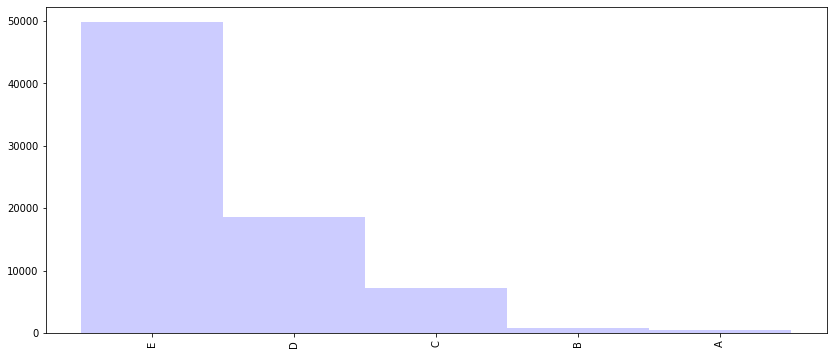

In [116]:
dist_freq_classes_renda['Frequencia'].plot.bar(width=1, color='blue',alpha=0.2,figsize=(14,6))

> ### Conclusões

Quase dois terços dos entrevistados, ou seja 64,75% ganham até um salário mínimo. Apenas 0,55% ganham mais de 25 salários mínimos. Muita renda concentrada nas mãos de poucas pessoas. 

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [117]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


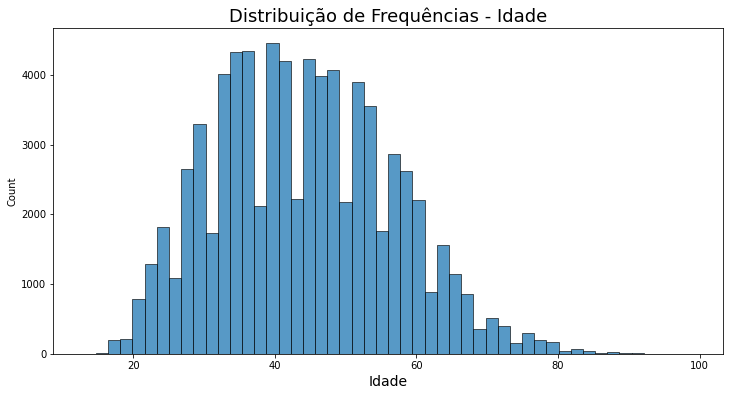

In [118]:
# As variáveis quantitativas são Idade, Anos de Estudo e Altura
# Distribuição assimétrica à esquerda
ax = sns.histplot(df.Idade, bins = 50)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Idade', fontsize=14)
ax

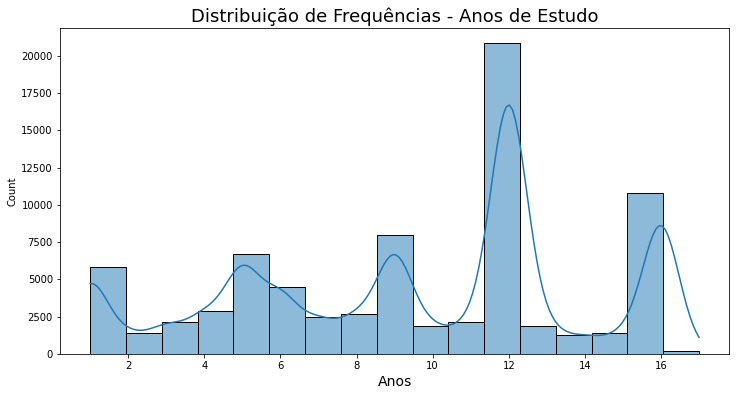

In [119]:
ax = sns.histplot(df['Anos de Estudo'], kde = True, bins = 17)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

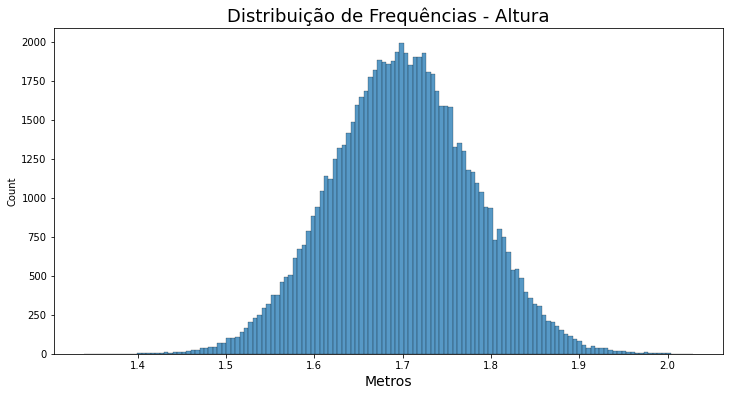

In [120]:
ax = sns.histplot(df.Altura)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

> ### Conclusões

Na distribuição de Idades, aparentemente há uma leve assimetria para à direita, levando em consideração que há poucas frequências para idades mais avançadas, acima de 65 anos, e consequentemente haver uma concentração maior entre 20 e 65 anos.

Na distribuição de Anos de Estudo, aparentemente há uma leve assimetria para à esquerda, uma vez que a moda é maior que a mediana e a mediana é maior que a média da variável.

A distribuição de altura aparentemente demonstra uma simetria, com uma concentração muito grande das frequências na parte central do gráfico, muito próximas à média e mediana.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


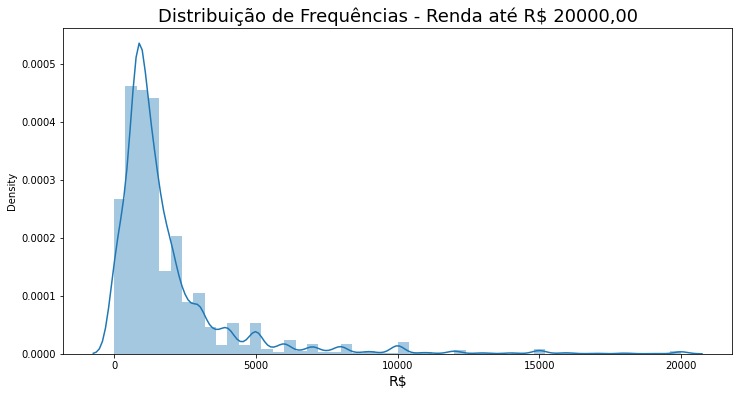

In [121]:
ax = sns.distplot(df.query('Renda <= 20000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Renda até R$ 20000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [122]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [123]:
freq_sexo_cor = pd.crosstab(df.Sexo, df.Cor)
freq_sexo_cor.rename(index = sexo, inplace=True)
freq_sexo_cor.rename(columns = cor, inplace=True)
freq_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [124]:
percent_sexo_cor = (pd.crosstab(df.Sexo, df.Cor, normalize=True) * 100).round(2)
percent_sexo_cor.rename(index = sexo, inplace=True)
percent_sexo_cor.rename(columns = cor, inplace=True)
percent_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

A maoria dos entrevistados são homens da cor parda, seguida pela cor branca. Esse padrão também é visto entre as mulheres, sua maioria é da cor parda seguida pela cor branca.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [125]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [126]:
df.Renda.median()

1200.0

### Obtenha a moda

In [127]:
df.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [128]:
df.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [129]:
df.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [130]:
df.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [131]:
agrecacoes_renda_sexo_cor = pd.crosstab(df.Cor, df.Sexo, aggfunc={'mean', 'median', 'max'}, values = df.Renda)
agrecacoes_renda_sexo_cor.rename(index = sexo, inplace=True)
agrecacoes_renda_sexo_cor.rename(columns = cor, inplace=True)
agrecacoes_renda_sexo_cor

max                   mean                median        
Sexo       Indígena         1     Indígena            1 Indígena       1
Cor                                                                     
Masculino   10000.0  120000.0  1081.710938  2464.386139    797.5   788.0
2          200000.0  100000.0  2925.744435  2109.866750   1700.0  1200.0
4           50000.0   23000.0  1603.861687  1134.596400   1200.0   800.0
6           50000.0   20000.0  4758.251064  3027.341880   2800.0  1500.0
8          100000.0   30000.0  1659.577425  1176.758516   1200.0   800.0

> ### Conclusões

Único valor máximo feminimo maior que o masculino se dá na cor indígena, que inclusive é o valor máximo mais alto entre as mulheres por cor.

A média e mediana de Renda mais altas entre homens e mulheres são as da cor amarela.

A média de renda de mulheres indígenas está mais alta que de mulheres brancas, perdendo somente para amarelas.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [132]:
dispersao_renda_sexo_cor = pd.crosstab(df.Cor, df.Sexo, aggfunc={'mad', 'var', 'std'}, values = df.Renda)
dispersao_renda_sexo_cor.rename(index=sexo, inplace=True)
dispersao_renda_sexo_cor.rename(columns=cor, inplace=True)
dispersao_renda_sexo_cor

mad                       std                         var  \
Sexo          Indígena            1     Indígena             1      Indígena   
Cor                                                                            
Masculino   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
2          2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
4           975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
6          3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
8          1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                         
Sexo                  1  
Cor                      
Masculino  1.429818e+08  
2          1.056909e+07  
4          1.821960e+06  
6          1.392166e+07  
8          2.547960e+06

> ### Conclusões

O desvio padrão mais alto se deu para mulheres indígenas, talvez isso explique a média alta, podem haver outliers puxando a média para cima.

Já a renda menos dispersa ficou para os homens ínigenas que já deteem a média mais baixa.

Homens de cor amarela tem a renda mais dispersa diante de homens de outras cores.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [133]:
df.Sexo.replace(sexo, inplace=True)
df.Cor.replace(cor, inplace=True)
df['Anos de Estudo'].replace(anos_de_estudo, inplace=True)

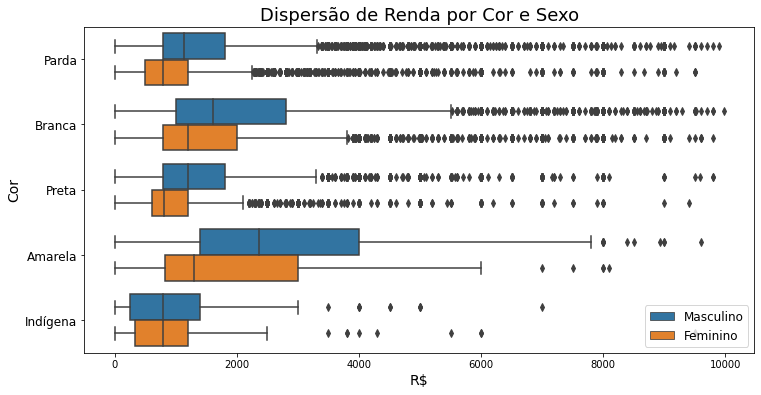

In [134]:
ax = sns.boxplot(x='Renda', y='Cor', hue= 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Dispersão de Renda por Cor e Sexo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Parda', 'Branca', 'Preta', 'Amarela', 'Indígena', 'Sem declaração'], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

> ### Conclusões

O comportamento masculino e feminino da cor amarela é nitidamente mais disperso, com o maior intervalo intequartilico dentre todas as cores.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [135]:
from scipy import stats
percentual = stats.percentileofscore(df.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [136]:
df['Renda'].quantile(q=0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [137]:
renda_por_anos_de_estudo_sexo = pd.crosstab(df['Anos de Estudo'], df.Sexo, aggfunc={'mean', 'median', 'max', 'std'}, values = df.Renda).round(2)
renda_por_anos_de_estudo_sexo.rename(index=anos_de_estudo, inplace = True)
renda_por_anos_de_estudo_sexo.rename(columns=sexo, inplace=True)
renda_por_anos_de_estudo_sexo

max               mean            \
Sexo                            Feminino Masculino Feminino Masculino   
Anos de Estudo                                                          
1 ano                             2000.0   30000.0   492.77    895.63   
10 anos                           6000.0   45000.0   925.92   1731.27   
11 anos                         100000.0  200000.0  1286.79   2117.06   
12 anos                         120000.0   30000.0  1682.31   2470.33   
13 anos                          20000.0   25000.0  1911.73   3195.10   
14 anos                          20000.0   50000.0  2226.46   3706.62   
15 anos ou mais                 100000.0  200000.0  3899.51   6134.28   
2 anos                            4000.0   40000.0   529.91    931.18   
3 anos                            3500.0   80000.0   546.85   1109.20   
4 anos                           10000.0   50000.0   704.28   1302.33   
5 anos                            8000.0   35000.0   781.39   1338.65   
6 anos                            6000.0   25000.0   833.73   1448.88   
7 anos                            9000.0   40000.0   830.75   1465.50   
8 anos                           18000.0   30000.0   933.62   1639.40   
9 anos                           20000.0   60000.0   868.02   1508.04   
Não determinados                  3000.0    7000.0   798.17   1295.76   
Sem instrução e menos de 1 ano   10000.0   30000.0   516.20    799.49   

                                 median                std            
Sexo                           Feminino Masculino Feminino Masculino  
Anos de Estudo                                                        
1 ano                             400.0     788.0   425.29   1331.95  
10 anos                           800.0    1218.0   620.61   2078.61  
11 anos                          1000.0    1500.0  1819.04   2676.54  
12 anos                          1200.0    1800.0  4851.83   2268.08  
13 anos                          1300.0    2400.0  2053.79   2797.12  
14 anos                          1600.0    2500.0  2064.08   3987.21  
15 anos ou mais                  2800.0    4000.0  4212.77   7447.61  
2 anos                            450.0     788.0   498.23   1435.17  
3 anos                            500.0     800.0   424.12   2143.80  
4 anos                            788.0    1000.0   629.55   1419.82  
5 anos                            788.0    1045.0   635.78   1484.65  
6 anos                            788.0    1200.0   574.55   1476.63  
7 anos                            788.0    1200.0   602.04   1419.71  
8 anos                            800.0    1300.0   896.78   1515.58  
9 anos                            788.0    1200.0   973.22   2137.66  
Não determinados                  788.0    1200.0   459.99    979.65  
Sem instrução e menos de 1 ano    390.0     700.0   639.31   1023.90

> ### Conclusões

Os valores mais altos são dos que tem 15 anos ou mais de estudo.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

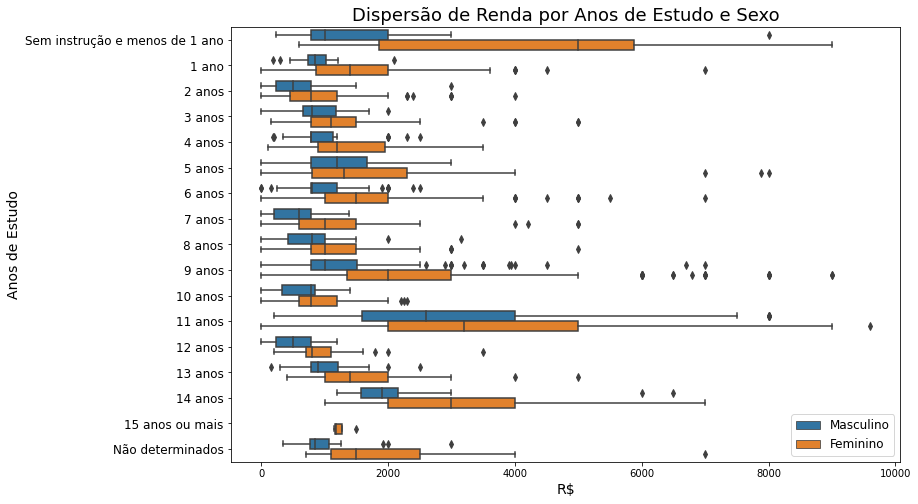

In [138]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue= 'Sexo', data = df.query('Renda < 10000 and Idade ==50'), orient = 'h')
ax.figure.set_size_inches(12,8)
ax.set_title('Dispersão de Renda por Anos de Estudo e Sexo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([value for value in anos_de_estudo.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

> ### Conclusões

Aparentemente, enquanto aumenta os anos de estudo, tende a aumentar a diferença de renda entre homens e mulheres com idade de 40 anos.

Com idade de 50 anos a tendência se repete.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [139]:
df.UF.replace(uf, inplace=True)
df.UF

0                Rondônia
1                Rondônia
2                Rondônia
3                Rondônia
4                Rondônia
               ...       
76835    Distrito Federal
76836    Distrito Federal
76837    Distrito Federal
76838    Distrito Federal
76839    Distrito Federal
Name: UF, Length: 76840, dtype: object

In [140]:
df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0, 0.5, 'UF')

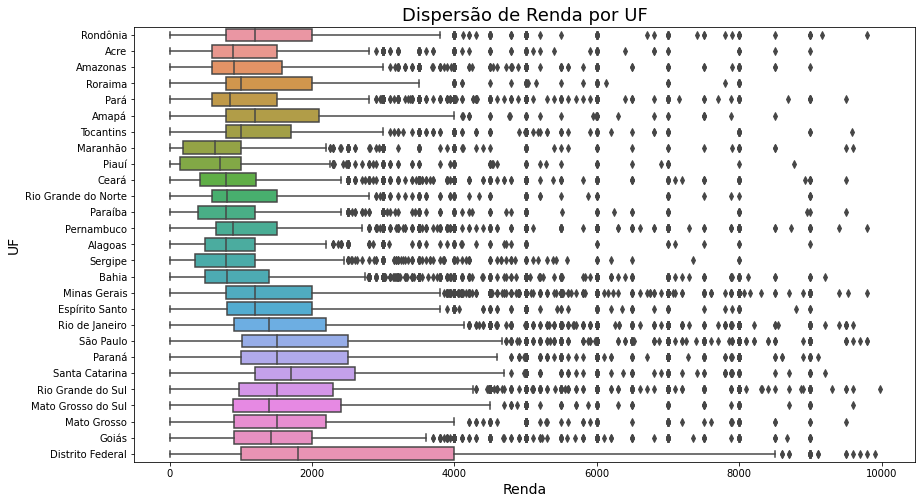

In [141]:
ax = sns.boxplot(data=df,x=df.query('Renda < 10000').Renda,y=df.UF, orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Dispersão de Renda por UF', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('UF', fontsize=14)

> ### Conclusões

Disparadamente DF possui a maior média, mediana, desvio padrão e intervalo interquartilico entre todas as UF.

O estado do Maranhão possui a menor média e mediana.

A menor dispersão é do estado de Alagoas.